In [ ]:
pip install TensorFlow-privacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.5/405.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 2.9 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=e5cfdc63bb4f114d4e5740878710939ef5c04752ab7362fc155c0ec775cf0b9b
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5

In [ ]:
%matplotlib inline

import numpy as np
from pprint import pprint

from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import grad
import torchvision
from torchvision import models, datasets, transforms
torch.manual_seed(50)

print(torch.__version__, torchvision.__version__)
import cv2
import random
import os

2.1.0+cu121 0.16.0+cu121


In [ ]:
from tensorflow_privacy.privacy.analysis.compute_noise_from_budget_lib import compute_noise

In [ ]:
pip install matplotlib==3.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 252.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=11756975 sha256=7c6524ed7083a4af6ccea484bd59b490314ad7f928176102e6d273d4723ec929
  Stored in directory: /root/.cache/pip/wheels/a7/83/5a/c704868d367ace343ac89b928f3d937313a5b5fb5731483705
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.

# **モデルの復元**

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                            batch_size=100,
                                            shuffle=True,
                                            num_workers=2)

testset = torchvision.datasets.MNIST(root='./data',
                                        train=False,
                                        download=True,
                                        transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                            batch_size=100,
                                            shuffle=False,
                                            num_workers=2)

100%|██████████| 9912422/9912422 [00:00<00:00, 112848987.82it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 123481848.95it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32292200.43it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6619363.71it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3) # 28x28x32 -> 26x26x32
        self.conv2 = nn.Conv2d(32, 64, 3) # 26x26x64 -> 24x24x64
        self.fc1 = nn.Linear(24 * 24 * 64, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(-1, 24 * 24 * 64)
        x = self.fc1(x)
        x = self.fc2(x)
        return  x

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = Net1()
directory = '' #モデルパスを指定
filename = ''
E = 16
D = 1e-5
target = os.path.join(directory,filename)
model.load_state_dict(torch.load(target))

<All keys matched successfully>

# **テスト精度**


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
  for (images, labels) in testloader:
    output = model(images)
    _, predicted = torch.max(output.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy: {:.2f} %%'.format(100 * float(correct/total)))

Accuracy: 76.05 %%


# **Deep leakage**

In [ ]:
def cross_entropy_for_onehot(pred, target):
  return torch.mean(torch.sum(- target * F.log_softmax(pred, dim=-1), 1))

criterion = cross_entropy_for_onehot

In [ ]:
dst = datasets.MNIST("~/.torch", download=True)
tp = transforms.Compose([
    transforms.Resize(size=(28, 28)),
    transforms.ToTensor()
])
tt = transforms.ToPILImage()

num_classes = 10
channel = 1
hidden = 588

In [ ]:
class Attacks(nn.Module):
  def __init__(self,DL_param):
    super(Attacks, self).__init__()
    self.model = DL_param['model']
    self.num = DL_param['num']
    self.dst = DL_param['data']
    self.DP = DL_param['DP']
    self.sigma = DL_param['sigma']

    self.criterion = DL_param['criterion']
    self.MSE = []
    self.DL_result = []
    self.DL_full_result = []


  def Dammy(self,gt_data, gt_onehot_label ,original_dy_dx):
    # generate dummy data and label
    dummy_data = torch.randn(gt_data.size()).requires_grad_(True)
    dummy_label = torch.randn(gt_onehot_label.size()).requires_grad_(True)
    return dummy_data,dummy_label

  def Attack(self ,dummy_data, dummy_label, original_dy_dx):
    tt = transforms.ToPILImage()
    optimizer = torch.optim.LBFGS([dummy_data, dummy_label] )
    history = []
    long_his = []
    for iters in range(100):
      def closure():
        optimizer.zero_grad()

        pred = self.model(dummy_data)
        dummy_onehot_label = F.softmax(dummy_label, dim=-1)
        dummy_loss = self.criterion(pred, dummy_onehot_label) # TODO: fix the gt_label to dummy_label in both code and slides.

        dummy_dy_dx = torch.autograd.grad(dummy_loss, self.model.parameters(), create_graph=True)

        grad_diff = 0
        grad_count = 0
        for gx, gy in zip(dummy_dy_dx, original_dy_dx): # TODO: fix the variablas here
            grad_diff += ((gx - gy) ** 2).sum()
            grad_count += gx.nelement()
        # grad_diff = grad_diff / grad_count * 1000
        grad_diff.backward()

        return grad_diff
      optimizer.step(closure)
      long_his.append(tt(dummy_data[0]))
    history.append(tt(dummy_data[0]))
    return history, long_his

  def Analysis(self,history, image):
    true = np.array(image)
    fake = np.array(history[0])

    return (cv2.quality.QualityMSE_compute(fake, true))[0][0]


  def label_to_onehot(self,target, num_classes=10):
    target = torch.unsqueeze(target, 1)
    onehot_target = torch.zeros(target.size(0), num_classes, device=target.device)
    onehot_target.scatter_(1, target, 1)
    return onehot_target

  def gaussian_noise(self, data_shape, s, sigma):
    """ Gaussian noise """
    return torch.normal(0, sigma * s, data_shape)

  def Target(self):
    ######### honest partipant #########
    tp = transforms.Compose([
    transforms.Resize(size=(28, 28)),
    transforms.ToTensor()
    ])

    true_label = []

    img_index = random.randrange(29999)
    img_index = 22627
    image = self.dst[img_index][0]
    gt_data = tp(self.dst[img_index][0])
    gt_data = gt_data.view(1, *gt_data.size())
    gt_label = torch.Tensor([self.dst[img_index][1]]).long()
    true_label.append(gt_label)
    gt_label = gt_label.view(1, )
    gt_onehot_label = self.label_to_onehot(gt_label, num_classes=10)


    clipped_grads = {name: torch.zeros_like(param) for name, param in self.model.named_parameters()}#new

    # compute original gradient
    out = self.model(gt_data)
    y = self.criterion(out, gt_onehot_label)
    dy_dx = torch.autograd.grad(y, self.model.parameters())

    clip_vals = []
    for p in (dy_dx):
      clip_vals = torch.median(torch.abs(p))
    if self.DP == 1:
        # bound l2 sensitivity (gradient clipping)
        # clip each of the gradient in the "Lot"
      torch.nn.utils.clip_grad_norm_(dy_dx, max_norm = clip_vals)
      # add Gaussian noise
      for param in dy_dx:
        param += self.gaussian_noise(param.shape, clip_vals, self.sigma)

    clip_vals2 = []
    print("After adding noise")
    for i in range(self.num):
      print(i,"times")
      # share the gradients with other clients
      original_dy_dx = list((_.detach().clone() for _ in dy_dx))
      dummy_data,dummy_label = self.Dammy(gt_data, gt_onehot_label ,original_dy_dx)
      history, long_his = self.Attack(dummy_data, dummy_label ,original_dy_dx)
      self.DL_result.append(history)
      self.DL_full_result.append(long_his)
      self.MSE.append(self.Analysis(history, image))
    return self.MSE, self.DL_result, self.DL_full_result



In [ ]:
q = 0.001  #DP用パラメータ
epsilon = E  #DP用パラメータ
delta = D #DP用パラメータ

In [ ]:
sigma = compute_noise(1, q, epsilon, 1, delta, 1e-5)

DP-SGD with sampling rate = 0.1% and noise_multiplier = 0.3356222243429145 iterated over 1000 steps satisfies differential privacy with eps = 16 and delta = 1e-05.


In [ ]:
DL_param = {'model':model,
           'num':5,
           'data':dst,
           'tp':tp,
           'tt':tt,
           'criterion':criterion,
           'DP':1,
            'sigma':sigma
           }

In [ ]:
fl_entity = Attacks(DL_param)

In [ ]:
score,pic,fullpic = fl_entity.Target()

After adding noise
0 times
1 times
2 times
3 times
4 times


In [ ]:
index = []
for i in range(len(score)):
  if score[i] < 2500:
    index.append(i)
print(index)

[]


In [ ]:
sum = 0
for i in range(len(score)):
  if score[i] < 2500:
    sum += 1

print("success_rate:",(sum/25)*100,"%" )

success_rate: 0.0 %


In [ ]:
for i in range(len(score)):
  if score[i] < 10000:
    print(i,score[i])

In [ ]:
from google.colab import files

In [ ]:
pip install --upgrade matplotlib

In [ ]:
direc = '/content/drive/MyDrive/DEEP_FL/PDF'
savepath = os.path.join(direc, filename)

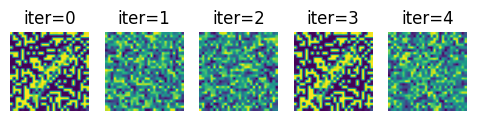

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(DL_param['num']):
  plt.subplot(1, 10, i + 1)
  plt.imshow(pic[i][0])
  plt.title("iter=%d" % (i))
  plt.axis('off')

In [ ]:
score

[23995.284438775507,
 21236.927295918365,
 19888.427295918365,
 23995.284438775507,
 20844.514030612245]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

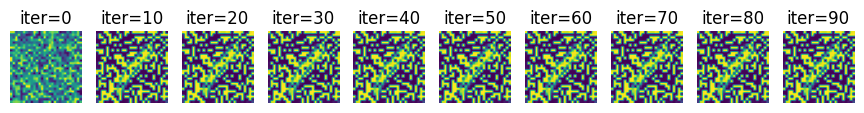

In [ ]:
picnum = 0
plt.figure(figsize=(12, 8))
for i in range(10):
  plt.subplot(3, 11, i + 1)
  plt.imshow(fullpic[picnum][i * 10])
  plt.title("iter=%d" % (i * 10))
  plt.axis('off')
  plt.savefig(savepath, format='pdf')
files.download(savepath)

In [ ]:
direc = '/content/drive/MyDrive/DEEP_FL/PDF2/'
savepath2 = os.path.join(direc, filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

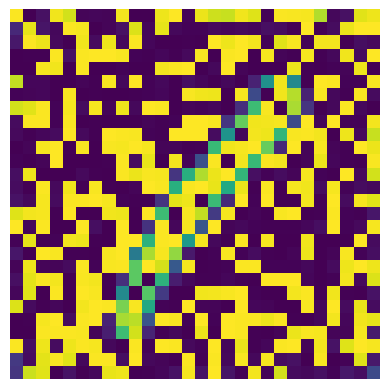

In [ ]:
plt.imshow(pic[picnum][0])
plt.axis('off')
plt.savefig(savepath2, format='pdf')
files.download(savepath2)

In [ ]:
E- 2：22515.611
E- 4：22515.611
E- 8：22515.611
E- 16：21897.13647
E- 50:16817.978316
E-100:6780.841836

SyntaxError: invalid decimal literal (<ipython-input-199-99f0789e110e>, line 1)